In [130]:
import pandas as pd
import pvlib
api_key = ""
email = ""

In [70]:
#Create empty PSM3 dataframe
#GHI: Average Watts/square meter / hour
#Dew point: Celsius
#PSM3_df = pd.DataFrame(
{"PhageID" : [],
"lat" : [],
"long" : [],
"GHI" : [],
"Dew Point" : [],
"Albedo" : []})

#Add row to PSM3_df
def add_PSM3(phageID, lat, long):
    data_df = pd.DataFrame(pvlib.iotools.get_psm3(lat, long, api_key, email)[1]).mean()
    GHI = data_df['GHI']
    dew_point = data_df['Dew Point']
    albedo = data_df['Surface Albedo']
    
    temp_df = pd.DataFrame(
    {"PhageID" : [phageID],
    "lat" : [lat],
    "long" : [long],
    "GHI" : [GHI],
    "Dew Point" : [dew_point],
    "Albedo" : [albedo]})
    
    return PSM3_df.append(temp_df, ignore_index='False')
 
    
    
    

In [71]:
import pandas as pd
#read phagesDB into dataframe
phage_df = pd.read_csv("SequencedPhages.csv")

#for col in phage_df.columns:
    #print(col)

#Drop N/A values of GPS, drop non-USA phages, drop unnecessary columns    
phage_df = phage_df.dropna(subset = ['Found GPS Lat', 'Found GPS Long'])
phage_df = phage_df[(phage_df['Found Country'] == 'USA') | (phage_df['Found Country'] == 'United States')]
phage_df = phage_df[['Phage Name', 'Found GPS Lat', 'Found GPS Long']]
phage_df = phage_df.reset_index(drop=True)


#display(phage_df)
#display(phage_df.loc[0:10, "Found GPS Lat"])

In [96]:
display(phage_df)

,Phage Name,Found GPS Lat,Found GPS Long
0,244,40.444259 N,79.953208 W
1,Aaronocolus,33.213 N,97.148 W
2,Abba,34.067996 N,118.450765 W
3,AbbeyMikolon,41.244625 N,75.88789 W
4,AbbysRanger,37.39757 N,85.01984 W
...,...,...,...
2891,ZooBear,33.19747 N,97.132884 W
2892,Zorro,40.957018 N,76.877916 W
2893,Zuko,38.7725 N,90.5564 W
2894,Zulu,39.172716 N,119.719321 W


In [142]:
#Add phages to PSM3_db
for ind in range(2874, 2895):
    #Drop the space and letter from the end of each GPS coordinate
    #Set limitations on GPS coordinates to make sure not outside of US
    if (25 <= float(phage_df["Found GPS Lat"][ind][:-2]) <= 50) & (-125 <= float(phage_df["Found GPS Long"][ind][:-2])*-1 <= -65):
        PSM3_df = add_PSM3(phage_df["Phage Name"][ind],
                      float(phage_df["Found GPS Lat"][ind][:-2]),
                      float(phage_df["Found GPS Long"][ind][:-2])*-1)
        print(ind)
    
    
display(PSM3_df)
    
    #print(float(phage_df["Found GPS Lat"][ind][:-2]))
    #print(float(phage_df["Found GPS Long"][ind][:-2])*-1)
    

2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894


,PhageID,lat,long,GHI,Dew Point,Albedo
0,244,40.444259,-79.953208,165.319749,6.244064,0.210630
1,Aaronocolus,33.213000,-97.148000,208.520662,10.775228,0.168027
2,Abba,34.067996,-118.450765,226.736530,8.049886,0.138521
3,AbbeyMikolon,41.244625,-75.887890,161.198630,5.206050,0.214192
4,AbbysRanger,37.397570,-85.019840,179.722945,8.319863,0.167863
...,...,...,...,...,...,...
2828,Zonia,38.627222,-90.197778,181.869178,7.802854,0.173589
2829,ZooBear,33.197470,-97.132884,208.520662,10.775228,0.168027
2830,Zorro,40.957018,-76.877916,164.913356,5.622260,0.224630
2831,Zuko,38.772500,-90.556400,181.154110,7.455525,0.181836


In [143]:
#Drop duplicates and reset index
PSM3_df = PSM3_df.drop_duplicates()
PSM3_df = PSM3_df.reset_index(drop=True)
display(PSM3_df)

,PhageID,lat,long,GHI,Dew Point,Albedo
0,244,40.444259,-79.953208,165.319749,6.244064,0.210630
1,Aaronocolus,33.213000,-97.148000,208.520662,10.775228,0.168027
2,Abba,34.067996,-118.450765,226.736530,8.049886,0.138521
3,AbbeyMikolon,41.244625,-75.887890,161.198630,5.206050,0.214192
4,AbbysRanger,37.397570,-85.019840,179.722945,8.319863,0.167863
...,...,...,...,...,...,...
2828,Zonia,38.627222,-90.197778,181.869178,7.802854,0.173589
2829,ZooBear,33.197470,-97.132884,208.520662,10.775228,0.168027
2830,Zorro,40.957018,-76.877916,164.913356,5.622260,0.224630
2831,Zuko,38.772500,-90.556400,181.154110,7.455525,0.181836


In [146]:
#Save dataframe to csv file
PSM3_df.to_csv('NSRDB.csv')

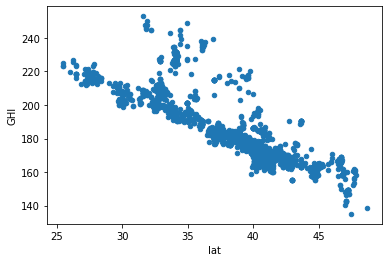

In [145]:
#PSM3_df.corr(method='pearson')
PSM3_df.plot(x='lat', y='GHI', kind='scatter')
